###  ПРОЕКТ 1  | E - COMMERCE |
***

<b>Задание</b>

1. Сколько у нас пользователей, которые совершили покупку только один раз? (7 баллов) 

2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? (5 баллов)

3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. (10 баллов)

6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. Описание подхода можно найти [тут](https://guillaume-martin.github.io/rfm-segmentation-with-python.html). (35 баллов)

<b>olist_customers_datase.csv</b> — таблица с уникальными идентификаторами пользователей <br>
<i>customer_id </i> — позаказный идентификатор пользователя <br>
<i>customer_unique_id </i> —  уникальный идентификатор пользователя  (аналог номера паспорта) <br>
<i>customer_zip_code_prefix </i>—  почтовый индекс пользователя <br>
<i>customer_city </i>—  город доставки пользователя <br>
<i>customer_state</i> —  штат доставки пользователя <br>

<b>olist_orders_dataset.csv </b> —  таблица заказов <br>
<i>order_id</i> —  уникальный идентификатор заказа (номер чека) <br>
<i>customer_id</i> —  позаказный идентификатор пользователя <br>
<i>order_status</i> —  статус заказа <br>
<i>order_purchase_timestamp</i> —  время создания заказа <br>
<i>order_approved_at</i> —  время подтверждения оплаты заказа <br>
<i>order_delivered_carrier_date</i> —  время передачи заказа в логистическую службу <br>
<i>order_delivered_customer_date</i> —  время доставки заказа <br>
<i>order_estimated_delivery_date</i> —  обещанная дата доставки <br>

<b>olist_order_items_dataset.csv</b> —  товарные позиции, входящие в заказы <br>
<i>order_id</i> —  уникальный идентификатор заказа (номер чека) <br>
<i>order_item_id</i> —  идентификатор товара внутри одного заказа <br>
<i>product_id</i> —  ид товара (аналог штрихкода) <br>
<i>seller_id</i> — ид производителя товара <br>
<i>shipping_limit_date</i> —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике <br>
<i>price</i> —  цена за единицу товара <br>
<i>freight_value </i>—  вес товара <br>


Пример структуры данных можно визуализировать по <b>order_id</b> == `00143d0f86d6fbd9f9b38ab440ac16f5`  <br>

Уникальные статусы заказов в таблице *olist_orders_dataset*: <br>

* created —  создан <br>
* approved —  подтверждён <br>
* invoiced —  выставлен счёт <br>
* processing —  в процессе сборки заказа<br>
* shipped —  отгружен со склада<br>
* delivered —  доставлен пользователю<br>
* unavailable —  недоступен<br>
* canceled —  отменён<br>


<i>Для начала импортируем все необходимые библиотеки для анализа данных по проекту и проведем исследовательский анализ датасетов (EDA)</i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import scipy as sc
from scipy import stats
import seaborn as sns
import datetime as dt
from dateutil.parser import parse



Считываем датасеты, присваиваем имена (в датасетах orders и items сразу меняем формат даты на datetime) 

In [2]:
url_customers = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/FUi5uSd6BfG_ig'
url_items = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Gbt-yAcQrOe3Pw'
url_orders = 'https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/t9Li4JOfgxuUrg'

customers = pd.read_csv(url_customers)
items = pd.read_csv(url_items, parse_dates=['shipping_limit_date'])
orders = pd.read_csv(url_orders, parse_dates=['order_purchase_timestamp', 
                                              'order_approved_at',
                                              'order_delivered_carrier_date',
                                              'order_delivered_customer_date',
                                              'order_estimated_delivery_date']
                    )

Проведем разведывательный анализ наших данных, для получения полной картины для дальнешей работы

In [3]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
customers.dtypes  

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
customers.isna().sum()   #с помощью .isna проверяем количество пустых значени в каждом столбце

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [6]:
customers.nunique()   # данная функция возвращает количество уникальных значений в каждом столбце


customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

например, в данных которые получены можно увидеть, что общее количество пользователей в датасете = **96 096**

---

In [102]:
items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
items.describe()   #функция describe показывает описательную статистику по столбцам в которых есть численные значения

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [9]:
items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

In [10]:
items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [11]:
items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

---

In [12]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


In [13]:
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [14]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [15]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [16]:
pd.unique(orders['order_status']) #проверяем какие уникальные значения в столбце со статусами заказов

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [17]:
orders.order_status.unique()  #2й способ проверяем какие уникальные значения в столбце со статусами заказов

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

delivered - доставлен <br>
invoiced - создан (выставлен счет) <br>
shipped - отгружен со склада <br>
processing - в процессе сборки заказа <br>
unavailable - недоступен<br>
canceled - отменен<br>
created - создан<br>
approved - подтвержден<br>

### 1. Сколько у нас пользователей, которые совершили покупку только один раз?  
***

Объединяем таблицу с пользователями и заказами, присваиваем переменную:

In [18]:
customers_and_orders = customers.merge(orders, how = 'inner', on = 'customer_id') 
customers_and_orders.head(3)

# используем функцию .merge, в параметрах указываем каким способом объединяем таблицы и по какому столбцу

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13


Я принял к решению считать "Покупкой", те заказы, которые доставлены: у которых статус "delivered" и есть дата в столбце order_delivered_customer_date. То есть по факту получения заказа клиентом, полный цикл сделки. 

In [20]:
customers_and_orders[['customer_unique_id','order_status', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']] \
                    .groupby('order_status',as_index = False) \
                    .count()

,order_status,customer_unique_id,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date
0,approved,2,2,0,0
1,canceled,625,484,75,6
2,created,5,0,0,0
3,delivered,96478,96464,96476,96470
4,invoiced,314,314,0,0
5,processing,301,301,0,0
6,shipped,1107,1107,1107,0
7,unavailable,609,609,0,0


In [21]:
buy = customers_and_orders \
                    .fillna(0) \
                    .query('order_status == "delivered"') \
                    .query('order_delivered_customer_date != 0') 
# фильтруем заказы со статусом "delivered" и убираем из выборки заказы с пустой датой доставки 

Считаем число покупателей с количеством заказов равной =1 :

In [22]:
buy.groupby('customer_unique_id', as_index = False) \
   .agg({'order_status': 'count'}) \
   .query('order_status == 1') \
   .nunique()


customer_unique_id    90549
order_status              1
dtype: int64

Ответ - **90 549** покупателей, совершивших одну покупку

### 2. Cколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?
***

Из всех статусов заказов доступных в датасете - к категории "не доставленных" больше всего подходит - canceled и unavailable. Все остальные так или иначе предшествуют успешному совершению доставки заказа (или ее отмене) - соответственно их расчет значения не берем.

Для начала посмотрим на диапазон значений в столбце дата создания заказа, для этого воспользуемся функцией max() и min()

In [25]:
print('Orders from {} to {}'.format(orders['order_purchase_timestamp'].min(), #показывает минимальное значение в выбранном столбце
                                    orders['order_purchase_timestamp'].max())) #показывает максимальное значение

Orders from 2016-09-04 21:15:19 to 2018-10-17 17:30:18


Как мы видим первый и последний месяц в данном датасете - неполные, <br> для корректного анализа по месяцам, необходимо отсечь эти данные, чтобы учитывать только полный месяц

In [26]:
orders_month = orders[(orders['order_purchase_timestamp'] > '2016-10-01') & (orders['order_purchase_timestamp'] < '2018-09-30')]

In [28]:
orders_month['order_purchase_timestamp'] = orders_month.order_purchase_timestamp.dt.strftime('%Y-%m') 
# используем метод библиотеки datetime - dt.strftime для преобразования форматы даты, нам необходимо убрать данные 
# по дням, оставив год и месяц 

AttributeError: Can only use .dt accessor with datetimelike values

Проверим:

In [29]:
orders_month['order_purchase_timestamp'].max()

'2018-09'

In [31]:
undelivered = (orders_month[orders_month["order_status"]
                .isin(["unavailable", "canceled"])]
                .groupby(['order_purchase_timestamp', 'order_status'], as_index = False) 
                .agg({'order_id': 'count'}) 
                .groupby('order_status') 
                .agg({'order_id': 'mean'}) 
                .rename(columns={'order_id':'avg'}) 
                .sort_values('avg', ascending=False)
              )
'''
1 фильтруем необходимые статусы c помощью метода isin()
2 Делаем группировку по 2 столбцам, один обязательно order_status
3 считаем количество значений, чтобы определить общее число заказов по статусам
4 далее находим среднее и выводим значение предварительно отсортировав по убыванию
'''
undelivered #недоставленные заказы

,avg
order_status,
unavailable,29.000000
canceled,28.136364


### 3. По каждому товару определить, в какой день недели товар чаще всего покупается. 
***

Чтобы ответить на этот вопрос я буду использовать данные двух датасетов - с информацией о товарах и информацией о заказах ( т.к. там присутствует информация о дате заказа). Объеденим два датасета в один, после этого приведем дату создания заказа к названию дня недели. 

In [33]:
orders_items = items.merge(orders, on = 'order_id') #объеденим таблицы с помощью .merge()


Посмотрим детальнее, какая информация хранится в данных по заказу, на примере одного заказа c большим количеством товара, отфильтровав **номеру заказа** в столбце **order_id** . Как мы видим любая покупка отдельного товара (даже если это один и тот же товар в заказе) записан в отдельной строке, соответственно каждая строка это 1шт товара. В дальнейшем для правильных вычеслений, я добавил столбец с цифрой 1.

In [34]:
orders_items.query('order_id == "8272b63d03f5f79c56e9e4120aec44ef"')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89,fc3d1daec319d62d49bfb5e1f83123e9,delivered,2017-07-16 18:19:25,2017-07-17 18:25:23,2017-07-20 15:45:53,2017-07-31 18:03:02,2017-07-28


In [35]:
orders_items['purchases'] = 1 

Датой покупки является столбец **order_purchase_timestamp**, преобразуем его в необходимые нам названия дней недели с помощью функции атрибута времени **dt.day_name** и запишем данные в созданный столбец **day**

In [38]:
orders_items['day'] = orders_items['order_purchase_timestamp'].dt.day_name()
orders_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,purchases,day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,1,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,1,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,1,Sunday


Далее через группировку, используя метод **.nlargest()** - осуществлю поиск максимального количества в шт купленного товара в разрезе дней (шаблон решения использовался во 2м уроке в минипроекте)

In [39]:
day_of_week = (orders_items
               .groupby(['product_id','day']) #группируем по 2 столбцам которые нас интересуют 
               .purchases.sum()  #суммируем по столбцу purchases для общей суммы по товару 
               .groupby(['product_id'])
               .nlargest(1) #параметр 1 указывает на количество строк, выводимой функцией, с наибольшим значением
              )

выводим полученую серию, с данными по количеству купленного товара с указанием дня недели

In [33]:
day_of_week.sort_values(ascending = False).reset_index(level=[1,2]).head(10).reset_index(drop=True) 
#использовал функцию reset_index чтобы MultiIndex series конвертировать в датафрейм и убрать дублирующиеся столбцы

,product_id,day,purchases
0,422879e10f46682990de24d770e7f83d,Wednesday,93
1,99a4788cb24856965c36a24e339b6058,Monday,92
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
3,53b36df67ebb7c41585e8d54d6772e08,Tuesday,76
4,389d119b48cf3043d311335e499d9c6b,Thursday,67
5,368c6c730842d78016ad823897a372db,Friday,67
6,53759a2ecddad2bb87a079a1f1519f73,Wednesday,66
7,d1c427060a0f73f6b889a5c7c61f2ac4,Monday,64
8,3dd2a17168ec895c781a9191c1e95ad7,Wednesday,54
9,a62e25e09e05e6faf31d90c6ec1aa3d1,Thursday,50


### 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.
***

в этом задании нам понадобится датасет из объединенных данных по заказам и пользователям **customers_and_orders** созданный ранее

In [34]:
customers_and_orders.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13


In [35]:
customers_and_orders2 = customers_and_orders[(customers_and_orders['order_purchase_timestamp'] > '2016-10-01') \
                                           & (customers_and_orders['order_purchase_timestamp'] < '2018-09-30')]

#отсекаем данные за неполный месяцы по аналогии со вторым заданием

создам колонку **month**, для группировки датафрейма с целью вычисления общего количества заказов в месяц по каждому покупателю, переименуем колонку с полученными данными в **count_orders**

In [36]:
customers_and_orders2['month'] = customers_and_orders2.order_purchase_timestamp.to_numpy().astype('datetime64[M]') 

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
customers_and_orders2 = (customers_and_orders2.query('order_status == "delivered"')    
                                .groupby(['customer_unique_id', 'month'], as_index=False) 
                                .agg({'order_id':'count'})
                                .rename(columns={'order_id':'count_orders'})
                                .sort_values('count_orders', ascending = False)
                                )


анализировать дату заказа буду по колонке **order_purchase_timestamp**, как в предыдущих заданиях
для того чтобы правильно рассчитать количество недель в месяце - приведу дату к количеству дней в месяце и поделю на 7 (количество дней в неделе), данные запишу в новый столбец **weeks**, делать это буду через атрибут **dt.days_in_month** (из 5 урока) который показывает количество дней в указанном месяце
поделю общее количество заказов полученные ранее на количество недель в месяце.

In [38]:
customers_and_orders2['day_in_month'] = customers_and_orders2.month.dt.days_in_month #dt.days_in_month атрибут показывает кол-во дней в мес
customers_and_orders2['weeks'] = (customers_and_orders2.day_in_month / 7).round(2)  
customers_and_orders2['avg_in_week'] = round((customers_and_orders2.count_orders / customers_and_orders2.weeks), 2)
customers_and_orders2

,customer_unique_id,month,count_orders,day_in_month,weeks,avg_in_week
7099,12f5d6e1cbf93dafd9dcc19095df0b3d,2017-01-01,6,31,4.43,1.35
23222,3e43e6105506432c953e165fb2acf44c,2018-02-01,4,28,4.00,1.00
65769,b08fab27d47a1eb6deda07bfd965ad43,2017-09-01,4,30,4.29,0.93
67358,b4e4f24de1e8725b74e4a1f4975116ed,2018-02-01,4,28,4.00,1.00
60369,a239b8e2fbce33780f1f1912e2ee5275,2017-02-01,4,28,4.00,1.00
...,...,...,...,...,...,...
31900,55a55b65ef7f279bf0e5846a645e5ba6,2017-12-01,1,31,4.43,0.23
31899,55a4c5ebfd8fcc86eb83882fa0464977,2018-01-01,1,31,4.43,0.23
31898,55a44284e2c362a0199fb0df3ea9fb7d,2017-09-01,1,30,4.29,0.23
31897,55a36ff7f14abc01688647c613b35836,2017-12-01,1,31,4.43,0.23


### 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. 
***

In [61]:
CustOrders = customers.merge(orders, how = 'inner', on = 'customer_id') 
CustOrders = CustOrders.drop(['customer_zip_code_prefix', #удалим лишние столбцы
                              'customer_city',
                              'order_approved_at',
                              'order_delivered_carrier_date',
                              'order_delivered_customer_date',
                              'order_estimated_delivery_date'], axis = 1
                ).query('order_status == "delivered"') # сделаем фильтр как и прежде по доставленным заказам
CustOrders.shape

(96478, 6)

Добавим столбец с информацией о месяце заказа сокращенный до *ГГГГ-ММ* с помощью метода **x.strftime**

In [62]:
CustOrders['OrderPeriod'] = CustOrders.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))


Проиндексируем датасет и добавим столбец с информацией о дате первой покупки, тем самым определим когорты пользователей, в зависимости от месяца первой покупки.  Для этого сгруппируем по индексу и выберем *минимальное* значение, также применим функцию **x.strftime** для приведения к виду *ГГГГ-ММ*, после этого обновим индексы

In [63]:
CustOrders.set_index('customer_unique_id', inplace=True)
CustOrders['FirstOrderMonth'] = (CustOrders.groupby(level=0)['order_purchase_timestamp']
                                           .min()
                                           .apply(lambda x: x.strftime('%Y-%m'))
                                )
CustOrders.reset_index(inplace=True)
CustOrders

,customer_unique_id,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,OrderPeriod,FirstOrderMonth
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05,2017-05
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01,2018-01
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05,2018-05
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03,2018-03
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07,2018-07
...,...,...,...,...,...,...,...,...
96473,1a29b476fee25c95fbafc67c5ac95cf8,17ddf5dd5d51696bb3d7c6291687be6f,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04,2018-04
96474,d52a67c98be1cf6a5c84435bd38d095d,e7b71a9017aa05c9a7fd292d714858e8,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04,2018-04
96475,e9f50caf99f032f0bf3c55141f019d99,5e28dfe12db7fb50a4b2f691faecea5e,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04,2018-04
96476,73c2643a0a458b49f58cea58833b192e,56b18e2166679b8a959d72dd06da27f9,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11,2017-11


In [64]:
CustOrders.insert(len(CustOrders.columns), 'TotalOrders', 0, allow_duplicates=False)
#добавляем столбец TotalOrders и заполняем нулями, в дальнейшем здесь будет информация по общему кол-ву заказов когорты

In [65]:
CustOrders.head() #проверяем как выглядит датафрем

,customer_unique_id,customer_id,customer_state,order_id,order_status,order_purchase_timestamp,OrderPeriod,FirstOrderMonth,TotalOrders
0,861eff4711a542e4b93843c6dd7febb0,06b8999e2fba1a1fbc88172c00ba8bc7,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05,2017-05,0
1,290c77bc529b7ac935b93aa66c333dc3,18955e83d337fd6b2def6b18a428ac77,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01,2018-01,0
2,060e732b5b29e8181a18229c7b0b2b5e,4e7b3e00288586ebd08712fdd0374a03,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05,2018-05,0
3,259dac757896d24d7702b9acbbff3f3c,b2b6027bc5c5109e529d4dc6358b12c3,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03,2018-03,0
4,345ecd01c38d18a9036ed96c73b8d066,4f2d8ab171c80ec8364f7c12e35b23ad,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07,2018-07,0


In [66]:
grouped = CustOrders.groupby(['FirstOrderMonth', 'OrderPeriod'])
# количество уникальных пользователей и общее количество заказов 
cohorts = grouped.agg({'customer_unique_id': pd.Series.nunique,
                              'TotalOrders': pd.Series.count}
                     )
# переименуем некоторые столбцы для большей наглядности
cohorts.rename(columns={'customer_unique_id': 'TotalClients',
                               'TotalOrders': 'TotalOrders'}, inplace=True)
cohorts

TotalClients  TotalOrders
FirstOrderMonth OrderPeriod                           
2016-09         2016-09                 1            1
2016-10         2016-10               262          265
                2017-04                 1            1
                2017-07                 1            1
                2017-09                 1            1
...                                   ...          ...
2018-06         2018-07                25           25
                2018-08                16           16
2018-07         2018-07              5949         6007
                2018-08                31           31
2018-08         2018-08              6144         6180

[219 rows x 2 columns]

In [45]:
def cohort_period(CustOrders):
    CustOrders['CohortPeriod'] = np.arange(len(CustOrders)) + 1
    return CustOrders
cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalClients  TotalOrders  CohortPeriod
FirstOrderMonth OrderPeriod                                         
2016-09         2016-09                 1            1             1
2016-10         2016-10               262          265             1
                2017-04                 1            1             2
                2017-07                 1            1             3
                2017-09                 1            1             4

In [46]:
# переиндексируем DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortPeriod','FirstOrderMonth'], inplace=True)
#создадим ряд содержаший размер каждой когорты FirstOrderMonth
cohort_group_size = cohorts['TotalClients'].groupby(level=1).first()
cohort_group_size.head()

FirstOrderMonth
2016-09       1
2016-10     262
2016-12       1
2017-01     717
2017-02    1628
Name: TotalClients, dtype: int64

In [47]:
cohorts['TotalClients'].unstack(0).head(15)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
FirstOrderMonth,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1628.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0
2017-03,2503.0,11.0,9.0,10.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0
2017-04,2256.0,14.0,5.0,4.0,6.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,3.0,NaN
2017-05,3451.0,16.0,16.0,10.0,10.0,11.0,14.0,5.0,9.0,9.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN
2017-06,3037.0,15.0,12.0,13.0,9.0,12.0,11.0,7.0,4.0,6.0,9.0,11.0,5.0,5.0,7.0,NaN,NaN,NaN


In [48]:
# разделим данные по столбцам на размер первоначальной когорты, чтобы получить долю заказов
user_retention = cohorts['TotalClients'].unstack(0).divide(cohort_group_size, axis=0) 
user_retention.head(20)

CohortPeriod,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
FirstOrderMonth,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,0.003817,0.003817,0.003817,0.003817,0.003817,0.003817,0.007634,0.007634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12,1.0,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,0.002789,0.001395,0.004184,0.001395,0.004184,0.001395,0.001395,0.004184,0.001395,0.006974,0.004184,0.001395,0.001395,0.002789,0.004184,0.001395
2017-02,1.0,0.001843,0.003071,0.001229,0.004300,0.001229,0.002457,0.001843,0.001229,0.001843,0.001229,0.003071,0.001229,0.001843,0.001229,0.000614,0.000614,0.001843
2017-03,1.0,0.004395,0.003596,0.003995,0.003596,0.001598,0.001598,0.003196,0.003196,0.000799,0.003596,0.001199,0.001998,0.001199,0.001598,0.002397,0.000799,0.001199
2017-04,1.0,0.006206,0.002216,0.001773,0.002660,0.002660,0.003546,0.003103,0.003103,0.001773,0.002660,0.000887,0.000443,0.000443,0.000887,0.000887,0.001330,NaN
2017-05,1.0,0.004636,0.004636,0.002898,0.002898,0.003187,0.004057,0.001449,0.002608,0.002608,0.002608,0.003477,0.002318,0.000290,0.001739,0.002028,NaN,NaN
2017-06,1.0,0.004939,0.003951,0.004281,0.002963,0.003951,0.003622,0.002305,0.001317,0.001976,0.002963,0.003622,0.001646,0.001646,0.002305,NaN,NaN,NaN


Теперь сделаем визуализацию с помощью .heatmap из библиотеки Seaborn, который подходит для визуализации когорт 

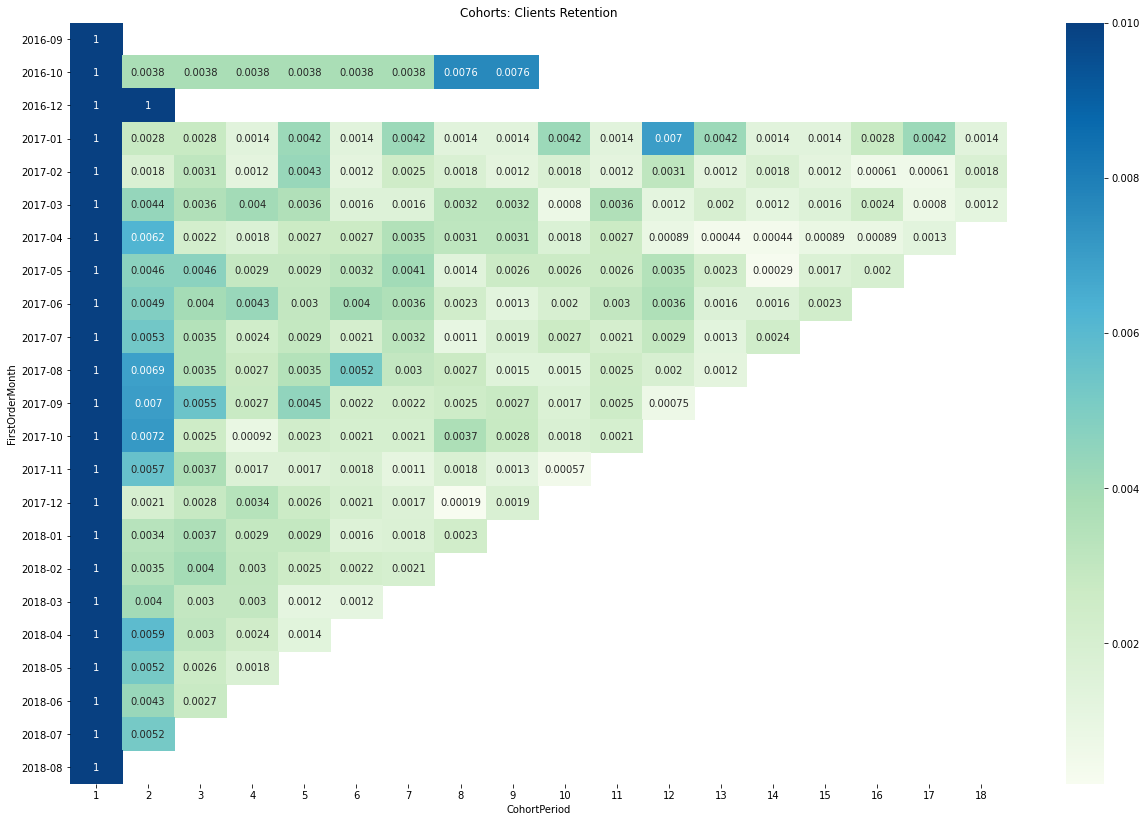

In [49]:
plt.figure(figsize=(21, 14))
plt.title('Cohorts: Clients Retention')
sns.heatmap(user_retention, vmax=0.01, annot=True, cmap="GnBu") 
#параметр vmax указываем число до которого происходит раскрашивание (чтобы избежать бледных цветов в связи с тем что первый столбец равен 1)
# cmap - название цветовой схемы

Ответ на задание - самый высокий retention **[0.0043]**  на **3й месяц** у когорты покупателей, оформивших первую покупку в июне 2017 года. (2017-06)

### 6. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров.
***

**Методология**
> 1. Recency = number of days since last purchase
> 2. Freqency = number of purchases during the studied period (usually one year)
> 3. Monetary = total amount of purchases made during the studied period  

Принцип RFM - анализа заключается в делении клиентской базы на сегменты (кластеры) в 3х независимых плоскостях-характеристиках относительно покупок/сделок которые совершил покупатель - Давность, Частота, Сумма покупок.


Для проведения RFM-сегментации нам необходимы будут данные по покупателям, дате совершения покупки и стоимости заказов. Для этого потребуется все 3 датасета. Объеденим их и уберем лишние столбцы
    

In [58]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [59]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [60]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04


перед объединенияем датасетов, приведем нашу таблицу с товарами и информацией по стоимости заказов к лакончиному виду, где будет указана общая цена за заказ

In [61]:
items_2 = items.groupby('order_id', as_index=False) \
               .agg({'price' :'sum'}) 
items_2

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90
...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99
98662,fffcd46ef2263f404302a634eb57f7eb,350.00
98663,fffce4705a9662cd70adb13d4a31832d,99.90
98664,fffe18544ffabc95dfada21779c9644f,55.99


In [62]:
items_2.head()

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.90
1,00018f77f2f0320c557190d7a144bdd3,239.90
2,000229ec398224ef6ca0657da4fc703e,199.00
3,00024acbcdf0a6daa1e931b038114c75,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90


In [63]:
orders1 = orders.merge(items_2, how='inner', on='order_id')
#делаем иннерджойн чтобы смотреть только те заказы по которым есть совпадения, в датасете items заказаов меньше, скорее
#скорее всего туда не попали заказы которые не были подтверждены
df_orders = orders1[['order_id','customer_id','order_purchase_timestamp','price']] #Уберем лишние столбцы
df_orders.head()

,order_id,customer_id,order_purchase_timestamp,price
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,29.99
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,118.70
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,159.90
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,45.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,19.90


Объеденим полученный датафрейм с таблицей customers и удалим лишние столбцы, оставив только необходимое.

In [64]:
data = customers.merge(df_orders, how='inner', on='customer_id')
data = data[['customer_unique_id','order_id','order_purchase_timestamp','price']]
data = data.rename(columns={'order_purchase_timestamp':'date','customer_unique_id':'customer_id'})
data.head()

,customer_id,order_id,date,price
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00


Сделаем доп проверку по общей сумме заказов из первоначального датасета и полученного в ходе преобразований. Суммы сошлись.

In [65]:
print(data.price.sum())
print(items.price.sum())

13591643.700000001
13591643.700000003


Будем анализировать полный временной период который есть в датасете, т.к. не будет привязки к месяцам и году. В сегментации будут ранговые показатели в которых будет информация в днях, например - кол-во дней с момента последней покупки

In [66]:
print('Orders from {} to {}'.format(data['date'].min(), #показывает минимальное значение в выбранном столбце
                                    data['date'].max())) #показывает максимальное значение
print(data['date'].max() - data['date'].min())

Orders from 2016-09-04 21:15:19 to 2018-09-03 09:06:57
728 days 11:51:38


In [67]:
period = 728

Смоделируем ситуацию, как будто мы осуществляем сегментацию пользователей в текущий момент. Определим точку отсчета как 'сейчас' в +1 день от даты поледнего заказа

In [68]:
now = data['date'].max() + dt.timedelta(days=1)
print(now)

2018-09-04 09:06:57


Выполним расчет значений Recency, Frequency и Monetary для каждого покупателя

Начнем с показателя **Recency**, который показывает как давно была сделана покупка(заказ) каждого конкретного пользователя
определим ее как *'сейчас' - дата покупки*. Полученные данные запишем в столбец DaysSinceOrder

In [69]:
data['days_since_order'] = data['date'].apply(lambda x: (now - x).days)
data.head()

,customer_id,order_id,date,price,days_since_order
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,124.99,475
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,289.00,234
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,139.94,107
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,149.94,174
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,230.00,36


Сделаю новый датафрейм, где данные для каждого покупателя должна быть одна строка, для этого сделаю аггрегацию, для показателя recency берем минимальное значение из колонки 'days_since_order'

In [70]:
aggr = {
    'days_since_order': lambda x: x.min(),  # общее количество дней с момента посл заказа (Recency)
    'date': lambda x: len([d for d in x if d >= now - dt.timedelta(days=period)]), # общее количество заказов за последний период (Frequency)
}
rfm = data.groupby('customer_id').agg(aggr).reset_index()
rfm.rename(columns={'days_since_order': 'Recency', 'date': 'Frequency'}, inplace=True)
rfm.head()

,customer_id,Recency,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1
2,0000f46a3911fa3c0805444483337064,542,1
3,0000f6ccb0745a6a4b88665a16c9f078,326,1
4,0004aac84e0df4da2b147fca70cf8255,293,1


Рассчитаем значение monetary, суммарный оборот по заказам за весь период для каждого покупателя, посчитав общую сумму всех покупок каждого покупателя, сделав группировку и агрегирование по столбцу суммы 


In [71]:
monetary = data.groupby('customer_id', as_index=False).agg({'price' : 'sum'})
monetary.head()

,customer_id,price
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00


Объеденим с ранее полученным датафреймом rfm, предварительно переименовав столбец price В Monetary

In [72]:
monetary.rename(columns = {'price': 'Monetary'}, inplace=True)
print(monetary['Monetary'].sum())
print(data['price'].sum())   #проверим по общей сумме

13591643.700000001
13591643.700000001


In [73]:
rfm = rfm.merge(monetary, how='inner', on='customer_id')
rfm.head()

,customer_id,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


Посмотрим на распределения значений в каждом столбце, используя метод квантилей

In [74]:
quintiles1 = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8])
quintiles2 = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.25, .5, .75])
quintiles1

,Recency,Frequency,Monetary
0.2,98.0,1.0,39.9
0.4,182.0,1.0,69.9
0.6,273.0,1.0,109.9
0.8,389.0,1.0,179.9


In [75]:
quintiles2

,Recency,Frequency,Monetary
0.25,119.0,1.0,47.9
0.50,224.0,1.0,89.9
0.75,353.0,1.0,155.0


Как мы видим используя квантили, в случае с показателем frequency вышло не очень показательно, т.к. количество клиентов купивших 2 и более раз всего 3% от общего числа покупателей, посмотрев на распределение количества заказов по клиентской базе, принял решение сделать кастомную сегментацию по количествую заказов.

In [76]:
print('1 заказ:')
print(rfm.query('Frequency == 1').shape)
print('2 заказa:')
print(rfm.query('Frequency == 2').shape)
print('3 заказa и более:')
print(rfm.query('Frequency >= 3').shape)
print('4 заказa и более:')
print(rfm.query('Frequency >= 4').shape)
rfm.shape


1 заказ:
(92505, 4)
2 заказa:
(2673, 4)
3 заказa и более:
(240, 4)
4 заказa и более:
(48, 4)


(95420, 4)

<div>
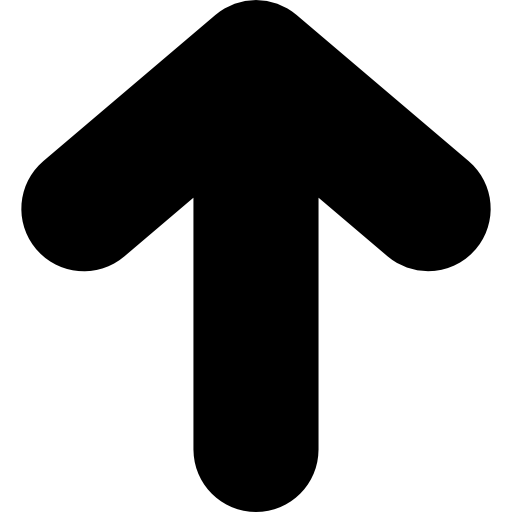  Будем использовать 4-е группы для сегментации по признаку Frequency <br> Для этого напишем функцию, чем больше заказов - тем больше число уровня сегментации и запишем в столбец 'F'
</div>



In [77]:
def f_score(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x == 3:
        return 3
    else:
        return 4

rfm['F'] = rfm['Frequency'].apply(lambda x: f_score(x)) #запишем в столбец, применив функцию через лямбду
print(rfm['F'].value_counts(normalize = True))

1    0.969451
2    0.028013
3    0.002012
4    0.000524
Name: F, dtype: float64


Посмотрев на разброс значений в столбце **'Recency'** я также решил сделать сегментацию по 4 группам со сроком давности покупки в днях по следующим диапазонам:
* **4** - 1-30 <br> 
* **3** - 31-90 <br>
* **2** - 91-365 <br>
* **1** - 365 +<br>


Пишем функцию, которую используем для заполнения столбца *r_score* в соответствии со значением в столбце **'Recency'**

In [78]:
def r_score(x):
    if x <= 30:
        return 4
    elif x <=90:
        return 3
    elif x <=365:
        return 2
    else:
        return 1

Сохраняем значение в столбец **R** применив функцию с помощью *lambda*

In [79]:
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))

print(rfm['R'].value_counts(normalize = True).round(2))
print(rfm['R'].value_counts()) # посмотрим на распределение в зависимости от сегмента

2    0.58
1    0.23
3    0.13
4    0.06
Name: R, dtype: float64
2    55445
1    22053
3    12449
4     5473
Name: R, dtype: int64


Аналогично проделаем ту же операцию, но использовать будем квартили (25%-50%-75%)

In [80]:
def m_score(x):
    if x <= quintiles2['Monetary'][0.25]:
        return 1
    elif x <= quintiles2['Monetary'][0.5]:
        return 2
    elif x <= quintiles2['Monetary'][0.75]:
        return 3
    else:
        return 4    
rfm['M'] = rfm['Monetary'].apply(lambda x: m_score(x))
rfm.head()

,customer_id,Recency,Frequency,Monetary,F,R,M
0,0000366f3b9a7992bf8c76cfdf3221e2,116,1,129.90,1,2,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,1,2,1
2,0000f46a3911fa3c0805444483337064,542,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,1,2,1
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,1,2,4


Сохраним в столбец RFM SCORE суммы значений из столбцов **R-F-M** для обозначения общего числа из сегментов.
т.к. у нас 4 сегмента в каждом из видов сегментации (больше=лучше) то клиент с **RFM_SCORE = 444**, наиболее лояльный, и, наоборот - **111** наименее, совершивший одну покупку и очень давно, таких клиентов можно считать потерянными

In [81]:
rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.sort_values(by='RFM Score', ascending = False).head()

,customer_id,Recency,Frequency,Monetary,F,R,M,RFM Score
3106,083ca1aa470c280236380973a48f77c6,21,4,218.88,4,4,4,444
82305,dc813062e0fc23409cd255f7f53c7074,12,6,687.76,4,4,4,444
45330,795c1622cf7a53d63d324e862349d01c,17,4,281.20,4,4,4,444
29774,4facc2e6fbc2bffab2fea92d2b4aa7e4,21,4,1686.90,4,4,4,444
58507,9cc5a07f169a1606fd347a56683e6ea6,13,4,365.70,4,4,4,444


In [82]:
rfm.sort_values(by='RFM Score', ascending = True).head()

,customer_id,Recency,Frequency,Monetary,F,R,M,RFM Score
37296,63b6869819505cd39cc9ac34ae18b0d1,469,1,33.90,1,1,1,111
68231,b6c5dc6ddcb93efe16687dc272f74aa3,506,1,43.90,1,1,1,111
9681,19d3f95244b5f1c1b5aaa292d5d15339,391,1,14.90,1,1,1,111
37589,649262de7a85e85d4aa59a350502429a,376,1,24.90,1,1,1,111
9670,19ca668a73743cde5a961ca9987b83ae,529,1,34.99,1,1,1,111


Чтобы проанализировать состояние клиентской базы построим **RF-матрицу** и после наложим значения M-score, разбил на следующие кластеры


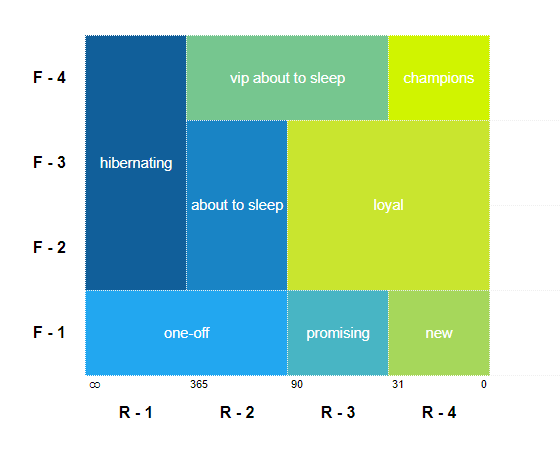

**Кластеры/Сегменты**
> 1. **Сhampions** [RF 44] - Лучшие клиенты, совершившие 4 и более покупок, не позднее чем 30 дней
> 2. **Loyal RF** R[3-4]F[2-3]  - клиенты покупавшие в рамках последних 90 дней - 2 или 3 раза
> 3. **New** [R4 F1] - новые клиенты - 1 покупка менее чем 30 дней назад
> 4. **Promising** [R3 F1] - клиенты подающие надежду, купили один раз от 30 до 90 дней назад
> 5. **VIP about to sleep** [R2-3][F4] - крупные клиенты, которые сделали 4 и более покупок, в период от 1 до 12 месяцев назад
> 6. **About to sleep** [R2][F2-3] - засыпающие клиенты, 2-3 покупки более чем 90 дней назад
> 7. **one-OFF** [R1-2][F1] - одноразовые клиенты, совершившие одну покупку более чем 90 дней назад
> 8. **Hibernating** [R1][F2-3] - уснувшие клиенты, 2 и более покупо, более чем год назад



Сделаем столбец с названием сегментов

In [99]:
segt_map = {
    r'[1][2-4]': 'hibernating',
    r'[1-2][1]': 'one-off',
    r'2[2-3]': 'about to sleep',
    r'[2-3][4]': 'VIP about to sleep',
    r'[3-4][2-3]': 'loyal',
    r'31': 'promising',
    r'41': 'new',
    r'44': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str) 
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True) #сделаем через маппинг добавления названия сегмента для каждого покупателя
rfm.sort_values(by='RFM Score', ascending = False)

,customer_id,Recency,Frequency,Monetary,F,R,M,RFM Score,Segment
3106,083ca1aa470c280236380973a48f77c6,21,4,218.88,4,4,4,444,champions
82305,dc813062e0fc23409cd255f7f53c7074,12,6,687.76,4,4,4,444,champions
45330,795c1622cf7a53d63d324e862349d01c,17,4,281.20,4,4,4,444,champions
29774,4facc2e6fbc2bffab2fea92d2b4aa7e4,21,4,1686.90,4,4,4,444,champions
58507,9cc5a07f169a1606fd347a56683e6ea6,13,4,365.70,4,4,4,444,champions
...,...,...,...,...,...,...,...,...,...
53399,8f70de4f81aa890f7e35d464f5247518,473,1,34.98,1,1,1,111,one-off
84390,e2249bc402f16751afa5815671a58107,470,1,37.90,1,1,1,111,one-off
53404,8f74bcedc184adf49cdfff4114f3bedd,376,1,21.99,1,1,1,111,one-off
69631,ba8e8db5ac53ffa4aca56c6a645b9e05,698,1,30.97,1,1,1,111,one-off


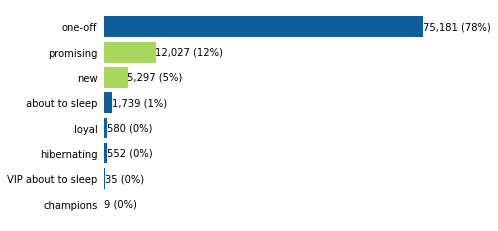

In [103]:
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='#115f9a')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['promising', 'new']:
            bar.set_color('#a6d75b')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

#### Выводы:


Как мы видим около 80% клиентско базы это одноразовые клиенты (one-OFF) в соответствии с нашей матрицей - это те, кто совершил покупку один раз, более 90 дней назад. Очевидно в продуктовой части бизнеса (судя по всему это Бразильский интернет-магазин) нужны кардинальные изменения.  

Но есть порядка 3% лояльных клиентов, нужно посмотреть глубже, в каких категориях они покупают, какие товары, инентифицировать этих клиентов и понять, что это за аудитория.
Можно провести CustDev клиентов которые "отвалились" чтобы понять, что послужило причиной прекращения покупок, что не хватает им для того чтобы покупать повторно.   
Полученные знания и опыт можно использовать чтобы работать с категориями **Promising** и **New** (выделенные зеленым) т.к. это те, кто только познакомился с сервисом и нужно приложить максимум усилий чтобы перевести их в категории клиентов совершающих повторные покупки.  

Отдельно необходимы мероприятия по активизации клиентов из Сегментов - **VIP about to sleep** и **Hibernating** , очевидно эффект от работы с этим сегментом будет выше, чем с **one-off** при прочих равных. Т.к. клиенты из этих сегментов уже совершали более 2х покупок и делали это относительно чаще.

***
**RFM - анализ** помогает разделить клиентов на кластеры и работать прицельно с каждой аудиторией, для разных сегментов могут быть использованы абсолютно разные инструменты